In [23]:
#So we can have a better visualization of the data
import pandas as pd
#Me molesta mucho ver los warnings jsjsjs
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Our code

In [2]:
#Aquí hicimos un diccionario de frecuencias por cada letra
def contador(entrada):
    frecuencia = {} 
    for i in entrada: 
        if i in frecuencia: 
            frecuencia[i] += 1
        else: 
            frecuencia[i] = 1
    return frecuencia

#Aquí creo el dataframe de mis frecuencias 
def dataframe (frecuencia):
    #Creé un DF para una mejor visualización 
    valores = pd.DataFrame(frecuencia.values(),columns=['Frequency'])
    letras  = pd.DataFrame(frecuencia.keys(),columns=['Letter'])
    #Concatené dos DF porque no me acordé como pasar llave-valor al mismo tiempo jejeje 
    data = pd.concat([letras,valores],axis=1)
    #ordené los valores de menor a mayor frecuencia
    data = data.sort_values('Frequency',ascending=False)
    #Muestro la informacion
    data.reset_index(inplace=True)
    data = data[['Letter','Frequency']]
    #Calculo el porcentage de aparición de cada letra 
    data['Percentage'] = (data.Frequency / data.Frequency.sum())*100
    return data

#Aquí creo una lista de tuplas de las letras y sus frecuencias. 
def tuplas(data):
    #Extraigo las letras y las frecuencias del DF para poder organizarlas en forma de tupla
    letras = data.Letter.tolist()
    frecuencia = data.Frequency.tolist()
    freq = []
    #Aquí es donde hago una lista que contiene puras tuplas con la letra y su frecuencia
    for i in range(len(frecuencia)):
        freq.append((letras[i],frecuencia[i]))
    return freq

#Here I add the three results to my dataframe 
def enc_arbol(freq,huffmanCode,data):
    #Creo una lista con todos los valores obtenidos en el arbol
    codigo = []
    for i in range(len(freq)):
        codigo.append(huffmanCode[freq[i][0]])
    #Agrego la lista a mi DF para una visualización más fácil
    data['Encoding'] = codigo
    return data 
    
#Here I encoded my entry
def encoded(entrada, huffmanCode):
    encoding=''
    for element in entrada:
    #Aquí es el caso es para prevenir el "crasheo" de leer el "\n" que no está en el codigo huffman
        if element not in huffmanCode:
            encoding = encoding + huffmanCode[' ']
        if element in huffmanCode: 
            encoding = encoding + huffmanCode[element]
    return encoding

#Here I decoded my text
def decoded(data,encoding):
    #Aquí pasé por pandas porque, por como lo imaginé en mi mente, necesitaría el mismo diccionario 
    #que el HuffmanCode pero invertido... sé que no está optimizado, pero jala 
    deco = {}
    #Aquí invierto el diccionaro, se me hizo más fácil pensarlo con pandas
    for index, row in data.iterrows():
        deco[data.Encoding[index]] = data.Letter[index]     
    #Creo una copia de mi variable encoding, me servirá para la comparación de los resultados
    r_encoding = encoding 
    #Empiezo con mi declaración de una variable "vacia"
    decoding = ''
    #Pongo un contador tempora, porque no sé a los cuantos primeros caracteres obtendré una respuesta de una letra
    long_temp = 0
    #Muentras haya letras por codificar, sigue
    while len(encoding)> 1:
        #Mientas no encuentre un "match" en mi diccionario, agarra otro elemento
        while encoding[0:long_temp] not in deco:
            long_temp += 1
        #Ya que encontró un match, lo agrega la respuesta
        decoding = decoding + deco[encoding[0:long_temp]]
        #Elimino entonces todosl os caracteres que ya "decodifiqué" para que no haya pedo
        encoding = encoding[long_temp:]
        #Reinicio mi vaiable temporal porque ahora mi encoding es "diferente", es cada vez más corta
        long_temp = 0
    return decoding 

In [3]:
'''
This is the three code
'''
# Aquí se crean los nodos que servirán para la union hijos-mejores vs hijos-menores para crear la raiz
class NodeTree(object):
    def __init__(self, izq=None, der=None):
        #Esto es para guardar las rutas de los hijos izquierdo y derecho
        self.izq = izq
        self.der = der
    #devuelve el hjo
    def children(self):
        return (self.izq, self.der)
    #devuelve el nodo
    def nodes(self):
        return (self.izq, self.der)
    #devuelve como strigng el hijo izquierdo y el derecho
    def __str__(self):
        return '%s_%s' % (self.izq, self.der)


# Main function implementing huffman coding
def huffman_code_tree(node, left=True, co_str=''):
    if type(node) is str:
        return {node: co_str}
    (l, r) = node.children()
    d = dict()
    #Función para poder codificar las letras, aquí se llama al arbol
    d.update(huffman_code_tree(l, True, co_str + '0'))
    d.update(huffman_code_tree(r, False, co_str + '1'))
    return d

### String N.1 (1000 bases)

In [4]:
#Aquí, obviamente, va la canción como una variable
entrada = '''aggttatccgaatttatcagatgccgagcagtgggagcgaagttatccagtctcaagctc
cacgtggcttttccctgattgagcccaagataagcagaagctctttcagtcccactctta
gggcaggggatgtcccatatgacgactttcagattttaacgaaacttccaatactgtggg
gtccaagacgtacgttcccatctgtaggctccggtgaacggcgatcgattgtacggtatc
aactccaacatttcatttccactgtgaacatattcacggctccggaggtgccaactttcc
tgcacaacgaccgagtggtagttcttcgtcgccacatgggccaggagcgacctgataggt
cggccacctccaatagtcaaacgacgagatgatgtttgattgtgcttggagttagttgtg
tatcaggagagcgaatcttggcggctaatatagattcctagtccgcaataagctagcggt
atgcataggcgcgaccgcgacatgtgggagtaattatggcccttatctgaatcccctgtc
aagccctctgtatgcgtagaactcttctgttaagaaaccttgacagctggcattgagcat
aagccttgtggcatcgaacacggtcgttagtgccgaatggtcccgcaacgttcttggtac
ttcgtggccggcacttgttcccctacagtgcagatccccccaagtcgtcatccggaagtg
gtactgtagtaataactgactaagagaggaaagacgagtttctgttgtttaaggtgtgct
ggtctccaccggcatttggggccggtggtacgttgttttcggcctttccggatatcctta
gacagacgagctcgactagcgctgagttatccgtatcacgatgtaacaaatgggccccac
cagagccgctcacagctcttgatcccgatcgtgagacctttgctaaatttaaatgtacga
cgacgcaattttgggctgtacgcccgccggaaacgtgtgt'''

In [5]:
#Here I count the frequencies
frecuencia = contador(entrada)
#Here I create my first dataframe
data = dataframe(frecuencia)
#Here I create the tuples value-frequency
freq = tuplas(data)
#Here I create a copy of my tuples
nodes = freq
#Mientras haya más de un nodo (mientras no se haya terminado el árbol), then:
while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
#This is my final dictionary of letter-huffmancoding
huffmanCode = huffman_code_tree(nodes[0][0])
#Here I create my last dataframe
data = enc_arbol(freq,huffmanCode,data)
print('Final Table')
display(data)
encoding = encoded(entrada, huffmanCode)
print('\nEncoded data:','\n')
print(encoding)
print('\nDecoded data:','\n')
print(decoded(data,encoding))
print('\n\n---------------RESULTS------------------')
print('The original file uses',data.Frequency.sum()*8,'bits')
print("The one that uses Huffman's encoding only uses",len(encoding),'bits')

Final Table


,Letter,Frequency,Percentage,Encoding
0,t,261,25.688976,11
1,g,257,25.295276,10
2,c,250,24.606299,01
3,a,232,22.834646,001
4,\n,16,1.574803,000



Encoded data: 

00110101111001110101100010011111110011101001100011110010110001100100110111010100011001100010011011110011101010011011011101001001100111010000100101101110100111111111010101111000111111000110010101001001100011100100110010011000100110011101111111010011011010101001011101111100100010101001001101010100011110110101010011100111100010110001011111110100110001111111110010010110001001001011111010100100111001011110111010100001011010100100110001011011001011011110101010011101111011001101001110101101011100010010110100110001110110001111110110010110101100111010000010010111010100100101001111111010011111110101001011110111000100101001110011111010010110100111010110100011010111001010010010111111101010001110010010100100101100010101100011011101011001101111011111011011011001010010100111101010010100110100011001100010101111000111001101011000011010010100101011101010010011100110110100100100101100010110001100011110001111011111110001111110111001111110100011011110011011111011100001100111010011010001100

In [6]:
#Here I save my results so I can use it latter for plotting 
length = [1000]
deco =  [data.Frequency.sum()*8]
enco = [len(encoding)]

### String N. 2 (3000 bases)

In [7]:
entrada = '''gcatgattcgaagtccttaattggcgcagcgttgatagcgaaccgaatctgtgtgcgagc
ctgctatttagtcacgcgttcgatgaaaggcgtagacgaccgaggaaaggtcgtacaatt
cacttagccgagcctgagtattaatagcgagatgggcccatcctcttccatcaactacgt
agtcatactcgaacctaagttcaaaagtccgtccccagcgcccacgtagagcttcctaag
tccagattagtttcaaatctctttgtttgccaatcagcagcccggatgagtccgcattgc
atcgcgaccacgtagttggcttatcggattctcggcgcttacaatactcaactttatgat
gtccttagaaatgaggcgtgggctgctgggtgggtgacttggaaaggaatcctgcacatc
ccacaacacacggtcacgcataagggggctaaatctggagttagccattacacgtcatcg
tactaacgtaaccgtacagcagccgcaggtccaaatgagagtgccaatcgtaaacgtgtc
agtagtccgcctaatgataatttgagaccacgtattagaccagataaaccaagcagtgtg
tcaggaaagcaaagcagatgctatggataccaacgaacagtaacgggcgtcggtcacgtt
gacctacctatttcgagttagcgcgcaaggtcgcggtataatgcttgacttcgcgactcc
gcgaaaatcaccccgtctccggcttgtcctacctgttggtatttatcaaccccgttgcta
acctccttcatcaaagtacgtagatagactagagggaacctgtacgtaggtatggactta
gctcgtgtgattcgtaaacacatttgtctcagaagtttggtccggcttgccagcggcttt
gattactggtgtgcgaagcaaccatctcaccggtgaaggatacgatttacatagaaatta
gtaaacccttggtatcccagacatggaagcactgcccccgcgcaaccacctttacggata
tgtaaagacagtagttagagggcctcggtaagtatcacttgtcgtagattataggccctc
caccttttccatgagctaattaggatccgcgtagtcccgcctctcatatcgactcattat
taatggcgtctacatttattgcccctcgccgtcgtccaatttgctataagcggctaaccg
tttcaagcacaccgcgaacaaggtttgcatgataccgtgatgtatccagctgcggcaaga
ctctgtttaaaggtcttcacgggtggacactacgttgtaacgagcgaccattctgctcct
aaaggcagaggcgtggaaactggacgcaacagatcatgtaagtgatgaaccccccgtact
tgctgagggaaaatcactctattcccctaggctagtcaacgctacatttttcctgacctg
gggaggtggtggttcgaccagaaacagccacatgaccacgcaagcgagactccctcgcct
gcgcgcttgagggggatgttccttatgttctccattcctggcctacgctgctcttatagg
atcggcgcgcactgtctttaaaactcgggatcccaccatgactcgcctaaatgccacact
cgtacacgatagaggggacgcattcgcctaaaagtctcccggatatcccactaaaagcgt
agccattattgggaataggaaattttggaataatgtcggactctctgggtgtcgcgtttg
agcgctttagcgtggtccatcatttcagatgtggaaggacttcagaagcgcgcgtcgact
cataagcagaagtcaaggacacaggacggattaagattaggcacaatacgatcaccgacc
ttcatctcggcatgtctatgtggaacattcgtcgggatttagtgtcatagctatatggag
actttttaagccatacctacccatcgaagcggcgccccatcatgcagtgacagcgtgggc
agcaagacggactccatttcggaactattattcagcccacgcatgggaaggtgtcggtac
aggggccgcccatgcgtatcggaaaaccctgttgattggtacatgtgacacaagggtcta
cctagggtacccgggcattttagtggcgtatgattgtactcgctgctatattactgctag
cgggggtctactaaagcgacaagttgctaagatgaaccacaagcccccaaattgttctaa
ccccggtccacgccaaggaggggctgagtgtgggctcctccataacacgaccagagtcgg
gggactgtggattttatttcaaagatgtcaagtggtccgatgattagaccgtaatcgtta
ctcgggcgcggcccataagcaaaagtaagtaagtaagtcgacataactgctattatcgtt
gtatcctaaattcgccttctgagtactccattagaacgtaaccaggaagctccaaagaat
ctcgcttgtacctaccatttgcgtcaatagccagtcctatccgagccagttccgaaaaca
ggaagtgatatggatagggaggagctcagtatttcggtagggcgatactgagttatttcg
ggctagctcaacccacccgagctgtcacgcgcgcaagtaattaccagtaacgcccttaac
ctactttagttcgccgccattgagaattcttatgatgcggaacgccacgtacccacgtat
atccgaatacaaaacgggaacattgcgaccaaaacaagggtcacccgtcaggtactctcg
gtcgtgaaggcaaaattacctggtgcggacggcgcatgcacaatgttaattatcaatcgc
ctactggcaagctagttggctagtcggaactcgaacctccttgatccgacctaggccttg
ctgcgtcccgttgtctgtccttccgttttgaatgtttccaagctgagcgagcggcacctc
ggcaagtagtcaattagtcgtaaggtgccaaggggcaggcttgcatgcggcatcggccta'''

In [8]:
#Here I count the frequencies
frecuencia = contador(entrada)
#Here I create my first dataframe
data = dataframe(frecuencia)
#Here I create the tuples value-frequency
freq = tuplas(data)
#Here I create a copy of my tuples
nodes = freq
#Mientras haya más de un nodo (mientras no se haya terminado el árbol), then:
while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
#This is my final dictionary of letter-huffmancoding
huffmanCode = huffman_code_tree(nodes[0][0])
#Here I create my last dataframe
data = enc_arbol(freq,huffmanCode,data)
print('Final Table')
display(data)
encoding = encoded(entrada, huffmanCode)
print('\nEncoded data:','\n')
print(encoding)
print('\nDecoded data:','\n')
print(decoded(data,encoding))
print('\n\n---------------RESULTS------------------')
print('The original file uses',data.Frequency.sum()*8,'bits')
print("The one that uses Huffman's encoding only uses",len(encoding),'bits')

Final Table


,Letter,Frequency,Percentage,Encoding
0,a,766,25.122991,10
1,c,765,25.090194,01
2,g,737,24.171860,00
3,t,732,24.007871,111
4,\n,49,1.607084,110



Encoded data: 

00011011100101111110100101000111010111111110101111110000010001100001001111110010111100001001010010100101011101111001110011100010010000111001111000111110111111111100011101100100010011111101001011100101010000001001111000100100100101001000001010100000111010011110011010111111110011001111111100001010010000101111001000111101111111010111100001001000101110000000101011011101011110111111101011011101101001111100100111110100011101101111001111010010100101111101000111111011010101000111010100111010101011000010001010110010011110001000011111110101111101000110111010110001011111110001111111110110101011101111011111111110011111111100010110101110110000110000101010000101110010001110101000110111111000111010111010001001001011001001111000111111000001111111101110100001011111101111010000010001111111100110101111001111011010011111111111011100101111100011101011111111000101010111001000000100111000000011110001111000000111000000111001001111111000010101000001010111010111100011001101110111001011001101001

In [9]:
#Here I save the data for further plotting 
length.append(3000)
deco.append(data.Frequency.sum()*8)
enco.append(len(encoding))

### String N.3 (5000 bases)

In [10]:
entrada = '''gatataaaggtacaccagcccattcgatctgattagcataaaaaataatggagatctggc
ggtaccgggcctttttcgtatcttctcatcgggcaactcatctcaactactcactagcaa
acgctcgagtgtggggcccaacagtatttagtcatcgacagagcagtaggagccagagca
atagaagccccgtcttctatacccgcaccctttggtgcccggtgtgacgtcttaggcggc
gtcgcgtttcacaggttcacaactccacggagatcaaggagtatatgccccataacccgc
cctccaatgttttaagctcttcgagctcaggtttcaagcttccaatgtcatcggaaaagt
cggacacgacggcgagaggtcaccggcctccatttaccaaccgtcggagccgctgtcgcg
tgctagtcctggaattacttcgtatgcgggcagggtacaatggcacaaaggtggtagggg
ttaccgctcggccattgcggccgaggggtcgtagcggtcaaggatctcgctatctgaggc
gctaatgacgcccctgcaagaatgaggagagcctgtaaggagggctcttcccatgaattt
ccagctcagctcccataagaccgcaaaagccagtatttggttggtgcacagggatagaat
aatcatcagccagcggaaccaaatcacgccactcccgcactgacaaacgtcaagcatttt
tacgatgcggctcctcaagggacacaacctaatttctctagagaccggttctttaggctt
gtcactttcatcccaaaaggtgcagatttcttgacagagacattgtcgagagggccctaa
ctataaaaaccttgtacaccgatacgaattagtagtgcggtataatagcttgatttgtaa
tagcccatcaggcttagttcggtctaggctgttaactctggagtcagtagtacgaataac
tgagaacggctgcctatacctagtgttcagattggagatagcatgctgtgcaaaccaaaa
tcaggctgcaggcccctgattacccaataacgtgtgaggtggactcacaagggttagcac
ctgtgatgagaatttttgagtacctactcatccttaccaaccctatcctaccggctccgt
tgtccagcatccaatcactgctactatttggccacgtaactgacttgcggagacctaacc
tccgacggaacgaccgagggcgactcccatatattggacgttactgactcgcaaatattc
gcgtaacggtgtggaacggcggcatgttgtttgcatacgagggggtcctgctctcgacag
gcctctgtcatgaaatggtcttcgttcttgagtggttttcgtgtacaacctttcgattcg
caacaaccgccaggaagcgaccggccgtcaatcccgggattgtccccgtttgatttaccc
gaaacagtcgtggcactacacgttgtcagggcctggggcagggatctatgtacacgaatc
ctcaaagcagtccgacgcaaaccaacagatgttgccgactcgtcccagattgtacaacta
ctaagcagtagggttatttgactgtccgtgcttttaatatgacggttgggctgtacttgc
ctcaggctacttccattggtgcattagaccccctggcctataccaccgggactgaactcc
ggcctgacttaccagttgggagttgccctgacggaatcaaatcgaacaaaacgagacgcg
cctacgggaaatccacgtgaacacttcggttttctacactccattccttcgtgcggcttg
tgattgggcttttcaagtcgaatccaagtatcagtcgaggctagaccctacagcggtaac
aatcttgtgttgacaagacataactcaatccgggcgaccgcaattcagttgtgtaagtca
tagttgcgggtaaagttctacagccagatcattaggcgcccacccaagatgaaacgcggt
ggtgaacagcatatttattccgacgattttttgactacactgatgtcaaaattacgttgc
accccgcgttctctatgaactgggtgaggacgtgcgttcgtcgtgtaaagacgagctaca
gaacactttaagacgccccagccaggttagatcgcccctaagtgagctacgatgcttatg
ggatgcagttttaccccatgaccccagtatttcaatagctaggggaaacttaatgacttc
gagatcaagccaatatccccgtagttttcagtgacccactaagggtccgtgctcaagtgc
ggaggaaactctaacagccgcccttcgtatcataggcttagatatgggctcgagatcctt
ttctaactatccctctgtgataagagaacccaaacgcagcaggtcagtatcccaaacccg
cagaagtagctggccaacttacggagaatattccgtctgcgcgtaatggacgtatagaaa
cccgaacgcaactgttaggtcatcttcttcaaagcagtatcgattattaatttagaaggt
accgcaaaggccacggaccgtaaagcggcggactggggcacactaacctacaatttgccc
ggcgagatccgatgctagcaggactaaagtcgacgtaactaggtggcatctcagggtgga
taggttcaaacctgacgtctctacctttgcgacttgatgtctacgcatactccttgcatt
tctgctccagggccgaagggtcttgcctatacagaccctcgggccgaggaacccttatgg
ccgggacccctccatagttacgcggcagtgagcagacatgtactatccggaagtagccag
tgaaatccaaggcccccgaaagccgtatcagttattaagcctggcgaccacgaagagccg
catcgtaaacacggaaacaacgaagtagaagaattctgtaatagataatgctttagaaga
tgttattctcgcgtggttcaggggggtctcatgagtgcctatgcgatagaactgagtaca
gacctctacattacctacggacgcaatactagacggtcacagcgggacgattaggactgc
gctcggtccgaaagggtcatgacaccctaattgacccacaagccctaagatcgagaccta
gtacatagcggtgttggctagactctagggtgttgcggcaataaccggcatctagatata
ggagctcggcgctccccgatcgcacaggcgcacgggaacgttagattgtacacggtttcc
gcagcacggcttcggacggtgaataggggagcgaggcctctcggggcaaataatcatcaa
gtcacgtacgtttcgtgctctattctcgcgatactcgccaaaccgaccggcgccctcgtt
acctaacggaacatgccgtttaacgtccatttcctaatatgttagtttcttagccttttc
ctcaacgatcgggctttagatagctgtaacaagtgggagtaaaacaaagataagacctct
aagtaaaggggttgaaatagggtagcctgggaatggaaagctggccagccgaagcattgg
cgcttcttcctgttcttctaactaataaaccacgtataatgcgtctgtcggctaaaagta
agtagtatgctcagctcgctgttcttgacgatcaatacgtgtcatgcgaggaggtgagtc
tacccctcagtcttgcatgtcctcataagtcattttgctccaagaatgtctacgttctta
atatgcccggttgtgcaaatctccaatctactagggactaagaaccaaagcggggcagca
cttggatatcaatatatgagggttctccagtatactagcgaataaagctgaaacgtcggc
tagtgaagcacaagagtcatccccacagatcaagtaaggcgtcgcagcccatggttgcct
ggtgggtagggtcggagacgaaacgtcacaaactactttttggggcaccatgcagtatgt
acgttttcatacacgccatttggccaaatagcggcgtctacatcggtgagcttccagctt
tcgactaaccacaaagcgatgtccgttcgataccaggcacagcgacgataattaatattc
cctgaatacaggatactccgttccaacccgggaagcaaattgggtctgatgaataccatg
ccattttgtctctctgcgccacaaatgtcgcctcgacaatatgtggttagtgcggagagc
acttctcaatactgcttaaccaaagcgacgattgacgtcctttagtggtcggatcctgct
tctcactccgcaggtggaagtaaagtcctacatggttatcgcggctgacgtacagggtca
aagtctaccgtatgagaatcgtatctctaactttggggtattcgtgcccacaacccgaaa
gataaatccgattttcatgcttcatcgtttacttctagtcgcgctgcatgagaggtgact
tctgccttataaatacatcccgtgggtgtcggggtcgttatcaggttaacacgctacaga
cagaacggccttcaccggccaaggcaaatgcccgcatgacattcgcactcattacctcct
ctgggtataacacctgtaacgcagggcggaggtctgtcgttgtaggtctatacagtttta
ttaatccgtacctcgcaagcaaattacacccgttcgctagaacgcgaacacaaaaaattg
tcgcgcaaggccccgataccccatcgttcgaatttctatattaacgggtcgtgagtttaa
ttctcttatcctataatcattttgtttgaccttgtctcacaaaggacacctgttaccctt
aaggggatattcctttctaccggcttgcagaattcccagaccagtgtcatcctaaagtct
cactgggcagtcaaagacgctggttagacaacctgaagggcagcatacagctcagcctac
agctacaaggctcttgatcgggattgctgcttccacataataaccatctccccgactcaa
gcaggataggctctataaac'''

In [11]:
#Here I count the frequencies
frecuencia = contador(entrada)
#Here I create my first dataframe
data = dataframe(frecuencia)
#Here I create the tuples value-frequency
freq = tuplas(data)
#Here I create a copy of my tuples
nodes = freq
#Mientras haya más de un nodo (mientras no se haya terminado el árbol), then:
while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
#This is my final dictionary of letter-huffmancoding
huffmanCode = huffman_code_tree(nodes[0][0])
#Here I create my last dataframe
data = enc_arbol(freq,huffmanCode,data)
print('Final Table')
display(data)
encoding = encoded(entrada, huffmanCode)
print('\nEncoded data:','\n')
print(encoding)
print('\nDecoded data:','\n')
print(decoded(data,encoding))
print('\n\n---------------RESULTS------------------')
print('The original file uses',data.Frequency.sum()*8,'bits')
print("The one that uses Huffman's encoding only uses",len(encoding),'bits')

Final Table


,Letter,Frequency,Percentage,Encoding
0,a,1293,25.437734,11
1,c,1286,25.300020,10
2,t,1221,24.021247,00
3,g,1200,23.608105,011
4,\n,83,1.632894,010



Encoded data: 

01111001100111111011011001110111010110111010101100001001111001000011110000110111011001111111111110011110001101111011110010000110111001001101100111010011011011101000000000001001100110010000010001011001001101101110111110001011001000101111100011100010111000110111011110101110011100010011110110001100011011011011101010111110110110011000000110110010110010011111011011110111011011001101101111011101011011110111011010110011011111101110101010011001000001000110011101010011101110101000000001101100011101010011011000110001111100110010000011011011100110111001001100100111001100000010111011011011000010111011111000101011100110111101111001011110110111101100110011000111010101011001111101010011100101010001010111100011000000001111011100010000010011110111000101101101100000010111101110000010101111000110010110010011011111111110110001010011011111011100111110011011100111101111011011001011101001101110100010101100000011101011111010011001001101111011101001110000110010011100110100001110001101100101000

In [12]:
#Here I save the data for further plotting 
length.append(5000)
deco.append(data.Frequency.sum()*8)
enco.append(len(encoding))

### String N. 4 (7000 bases)

In [13]:
entrada = '''aatgcagacgcactttactagccttctgagcttctaattgatagaatttgctcacggatc
aatgtgggccctgacccacactgaggatgccacaacgtcatatacttatgaaagcttaac
gcaaacgtcgaccttgtgcatgctattagagagaatttcggctgggggagcatatgaggt
gataaatacgagaatttcaagctagttcttaattaacgcgtcgagcgtaacagtgcgttc
gtctgtcgagccagagacgagtgattacagaaggtaccacgctgatggggctccgtctac
cgtatactgtcgttctcggctctctgaacatacactttacatcatcggaagccccatcgc
cgctgagaagaatcacctaacttgtaagttagccctatgatgtcctagagtagttatcac
taacgtttttaatatcggcaccgaggacgcttgtatttagggaacgatacaatttcagtt
ttcgagtggtttgggcaaatctcgcgcatatctcgcagcacggaggcttcgaacggtact
gggcttaacgctattggtccttcgcatcgagtggccagaatttgcaaggtaggctatcag
gatggcctattagttctgaattgaagcgcggtcggcccccttacaactataaggggcccc
cgttaagttcgtcccctgagttaccatcgacgccgagtcacttggagacagactgtgggg
gagcggagaaaatttgcgacctgccgccaagcgttgatgcaaccagcgtgcttcttgcgc
tgcgagtcagtccgggagagcgtgagtcacctacagacgccatttggagcagagccaact
gcatgccgggaaaagcgtattgaggagtcgcaatcacagctgatttcgcatgcgacagcc
cgtggaattttagggaactacggcagtttgattcgatcaagtgcaacctcctcagagtat
ggaaatgcgccagagacggtgacgaccacaaaagatttagtgacttatacatgggacacc
ttctttagtttgcaaggatgctatgcgagtcagcgtcgtgcacgcaaacacctacaggtc
gttcagcacctactaaaatcatgtgttagtacggcaatggctcctgatcataagttctcc
gatcgacattcggacctggactggatcgccaatccattaggtacgtacgcgtacttgtgt
agtatcggcaagctgtttttggcaccagacaaatagtgtgtgcttgtggcaccagggctc
gaggactgccggatttttcttaaatgctgcatgcgaatatctgtcatgcacgcagcagaa
tttagagccgtcacccgttctgtcttgtgtgtgtgttgggcctaggcttggccgtacgtt
atccagcttcgaagggcctaaatacctgcacgacacgataacatagcttgtccagtaaac
acttcctcacataccacaggatgctattctaacagaatcttgccgccggcacgaaagcga
gctagtatcccattcggttacttcttgcgtcgacactccagtacgaaggtctccctccac
tacggatcctaaacgtagagcatacctgctgtagttctgtttacttatcccaccctggga
cgccctatgtcggcagcgaagctcccctttgacagaagctgaaaaacttagctagcattg
cattcaccgtatcagaaacctttgctaccactcctactaggttgcgtagctttcctcggt
tccagacttctaagccggccacacccgcctacgtcaccctaggtaaccacagaccacggc
ggacactggagacttcagtccatgaatccagagtaagtctgaccaggatccagcaatggc
gtaccggtccctactgaatataattctatgttgggtccctctcaaaagctaggatcgtaa
gtgagcagccagagattacctacttgcatcgatgtgtgatgtgatactcctgtcagcgcc
gtcgtaagttgagcgtaatattgacgtgaactggtcactaacactagatcaacccatgcc
gacgtattttacgctaatagggaccctagtaagcgatccttaagagatgagccttattga
tctaagtcgaaaatggccttttagactcggagttcaggagcattgcctaacttcgagact
tcccatatacttcaataaagagaaataagtgttgatcacattccggggagttaaagaagc
taactgtgagtaattgctggtgctgggttcgggtgtgggcccggtaaaagggggagaagt
actgtaattctgctcctttgagtgtttcacgagtagtatggacccagcacgaacttagcg
tcccctggttctgaggaacgatccgtgtggatggcgagtgactcactgcgtgcgggtccg
tataatggcttaagacgcgtcactaccaatcggaattttcttgttatatggcgagtttca
tccaagttctaatccgtatttcataaccatctacgggccgatggaacatctcccaatttg
cctgctatatccaaattttcactgatgcgatctacggttcccactcgcgtgggaccatct
gaagcagccgcaaacatgaccgcctcaccaactcccgcgaggtttagcatgtggtggcgc
tatgtctttagatcgtcgcgaaggactcgcaatcaacgaagtgtacagatcaaccgggca
tcgacgcatagttagcattactccgactgagccgatgtttttgccaagacgttggaagac
accacccgaatgttacggcgtgatgcagtctcactttgaatcgtgacactaattttactg
attccacagaaagttttaacgtcgtttatttaggcatgcgccaagtccatagatgctctg
tctaaaaagccctcggacaaccaagaccggtcatggcccccgtgctggcaatctgaaacc
ttcgaataacgctatctaggcacaatcacccgaccgactctcccggggagtgacaggcct
tccttgctggtcgcgcatgaggtcagagcaactccgtctcaggccgatgacaaccgggcg
ttggcctccattttataagtcaggagagtaaatcgttttgtatttatattagctcggctg
aatgagtagcgacatccttcgtgacactgtggtagggtgggaccataatcggcgaatgct
agcaccttggttcgaggcccgccacacggaatcaagccggtgacgacccgagagaaggat
caatcgtacaggaagcccatagagtcgtagtttgccagcctgtggtcggaatgcggtata
attacactctcatccaccgcgctcgggaagttgtcgagctacctattggctctgagttcc
accgacaaagtatgtgatacttgcgggccatcagagcatcaatcatgatagcactcgatt
ggctgagctgcctagtttgtaagtggtttaatcttcacttaacataactgaaagagatcc
ttacgattcatgatcgggggccgtaggcgccccccaggtaatgtacctggtggcgagtaa
cgtggttcccagttaccgcatagcgtgccaatgagctcgcccggggtagagatgaggtat
agcccgaaatgacgccggtaaaacactcttttgaccagctgtatgtccgattgaatcgtc
agcgtcaaattacccgggccctcagccagccgcgtgtctgctcggtcggccgcagagcgt
ataaggtagtctagtgggtgacaagtcgcctttggagatattggcccatcatgccgagtc
gtgaagctacgggtggacgggcccattaggaaacacagatccacagtagaaggttaccag
agtttcgtaccgcgcccctggattatgctaccctaatgattatctcatccaagctgtcga
cacgtgtatgtctcgatttcccgagcaagaattagccccctcccccggcttcgctccccc
gtaactcggtcacagtctgttgctagaatgctagtgttaagcgagctcgcgcctcatagc
ggtttcataatgtaaacgcgtactaatcggttgtgacgcagaattccgagcgtcgacata
gttccaatacctagcgccgtagctcaggacgttcttcctttaaccacagacgcaacgaag
agttctagtgcacagagggcaatttattattccttttcggctaagtttctccggaggttt
cccaaccctactgctgagaggatgactgaaacagtgttacggggccgagctaatagggga
ttggctgtatcgagggccttccggaagccattcaaggggtgatataactgttggcatcat
atcgtctccgtacgtgccgtaaacaggtaaccagattcctaagccactacgataggagat
gtatactgtgtctaaagaatccggttggtatgccccaacaaccgcgaaaatcacgctggg
agcagcacatactggaatactacgtggggaacacgtacactccccgtcagcatggaggag
ctagtgccgcccgcgtaagcacaaataaccagtcatgactggattacctttagattaacc
attggtacagcgatagaatttggtcccactaggaacaaggtatagatttctcgagaccct
tcaaacaattaagggctcgcgtagatagttcatgacatgcaggcagcgttcgttgggtca
atcatcggtaagcggggctgagctccgaaggacttgcttttagcgcgctctacgatccaa
ttgcattcctgtggtatgaatgccaccctctgcgttcgttccatgtagccaggctgtcca
ttgaagcaatttcccctcatatagcgcgaattaagcggcccgccgaccgccaagagtatc
atattagtgattgccacacccgccaaccttctacatgtgacaataggatgcacttcctca
tattacggccaccatccttagctcaggcttgtgtttaaaggactttgaacggctctaaag
acccaatttgggtcaaatggatatctttcccctgtgcatgcaaaaatcgtgacccgattt
gttgtgatcctaggcagtaatcgattatctatataaccacgggggtacattggccgatac
gattagataattctcacgcgtataatgagaacaatggtttggtgagtaccccaccgttat
aaaggaaaacgattaagtccgcaatcgataaaccgtgacctccgccaatggtcgtggatg
tttctgtagacgtgcagcacttaggttcccaagaatcgatacttgcgcatagacccctaa
attcccatggaggtcgcagtccgaaatcgtgtagtatcgatacacttcatcaactttccg
gatctagggttcaatcgctactgtagctaacgggtacaggcaacgagggggccgtccagg
gcaaggtagggcattggaccagccaactcgggtcttacatatggccggtgtagtatgctc
gtctcacctgagtacgcgtactttccctacattcagtgaggaggaagttattgacggtga
tgtcacctctcgtcaagagcgccttgagagcatccagactccaggactcgaaggtcaccc
gttattcgaacggcgttcagaagctggcgactaccgccaaggcccaggtaaacttaaact
ttcaaattggactcttattcagagagcggcgccgacatcacagtgcctcccccatgtcaa
agagccctatactttacacatcagcatccgtcgcggacttggcaacgtaacgattcagag
ctcgagtgccgaagaccatcaatacagccgcactatttctggtttccgacctgtggtacg
tcttatggtttcgcgaacgcggcagaacggctgtccacagggcaacgcgacgcatccggc
gacgaatctcgaacggaagtaattcctcggacaggttttccacgtgttgatatctattgg
gagtgtgggaggcctgttgaggtcaggtcacggcatactgacctattatttggattatcg
cccccgatcctaggagttgtacatgggacacaagcggttaacggaatgtctaactgtgat
atcacgaaatactttcagcaagacggaacaatttcgtaccctgcgctcccgatgtgcttc
cgtgatggtgtctggtaatatcttgccgcagaccgtggcgacaaggttacgtgcgcgtct
agtcatctgtcgccggtgccatgttaaggagtataatgtcgcaccaacgttgaacccgag
atgacgactcttgtttcttatagagttaaacagtcgttcaaacgcattaatagctatttc
attgcactgacttatctttttgtatccactcgaagagggaggcaggagcttgacagtaag
cgcttgcaccgcaacctgccacgcgtggcgctatcctatcgcgtaccatcacatgagcac
gatacgctgttcgcgtacacaacacaactagaattctccttgtccctatgctcgaccttt
acagtgtatgaaaaatctcgagaaacacgcgactctcatagatcattgaccccgatcatt
gagccgcagcgagtggcattctgacaggagccgcccacctggagtgtcgagcctccacac
aaattagtattcatgaaactttaggcccacacaacaggcgtaacaggggccctaaacgtg
atccgtccaactcctaggcgaaatgggtcccctggacgcaaagcgctggaacgggacagt
aacgtcttcaaatttcaagccgatcacgaatggccaccaaatttatctttcgcacccttc
cccgcaaaatcgatgcgggaatcctcagcttggtaaagtagatgctccacttagcgaacg
tgcatctagctcggatagggaagtaatgaggtcagacactcgaccatttattacaagcct
acttgtcgcgttccccccagaacgcgtgagctggtagtctatcatagcaagctcattgcg
cggcatctgcccggcatttaagtgaagtgctgcagtgctt'''

In [14]:
#Here I count the frequencies
frecuencia = contador(entrada)
#Here I create my first dataframe
data = dataframe(frecuencia)
#Here I create the tuples value-frequency
freq = tuplas(data)
#Here I create a copy of my tuples
nodes = freq
#Mientras haya más de un nodo (mientras no se haya terminado el árbol), then:
while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
#This is my final dictionary of letter-huffmancoding
huffmanCode = huffman_code_tree(nodes[0][0])
#Here I create my last dataframe
data = enc_arbol(freq,huffmanCode,data)
print('Final Table')
display(data)
encoding = encoded(entrada, huffmanCode)
print('\nEncoded data:','\n')
print(encoding)
print('\nDecoded data:','\n')
print(decoded(data,encoding))
print('\n\n---------------RESULTS------------------')
print('The original file uses',data.Frequency.sum()*8,'bits')
print("The one that uses Huffman's encoding only uses",len(encoding),'bits')

Final Table


,Letter,Frequency,Percentage,Encoding
0,c,1791,25.168634,10
1,a,1754,24.648679,01
2,t,1732,24.339517,00
3,g,1723,24.213041,111
4,\n,116,1.630129,110



Encoded data: 

01010011110011110110111100110000000011000011111010000010001110111110000010000101000011101000111101010000001111000100110111111010010110010100111001111111111010100011101101010011001100011101111111010011110100110010110111001001000100011000000100111010101111100000010110110111100101011011100101110110100000111001111001001111000010000011110111101111010100000010111111100011111111111111101111100100010011101111111001101110100010101000110111011110101000000100101111100001111000010000001010000010110111101110010111011111011100010110011110011110111000010110111001000111001011101111101001111011110110111011110011101000001100111101011111110001101001101111000111010011111111111110001010111001000011011010111000100011000111001011100001000101111111000100010001110101100100011001100000000110010010010010111111010111110101010010010111101101011110001110111101011110101001001101000010110000011100010111100000111110101000010011101001110010100001111011110001111000001001001101100001011011100000000000101

In [15]:
#Here I save the data for further plotting 
length.append(7000)
deco.append(data.Frequency.sum()*8)
enco.append(len(encoding))

### String N.5 (9000 bases)

In [16]:
entrada = '''ataggagagtgggactctcgcgattgtggggaggctatctaatcctgccgtcgagctcac
tgggcaaaatcaacctcagttaactcctgaccgcacatgaagctctcgtgctaaggtagc
gagaccccggagtgtgccccggttaagaataaataaacatccctctatcccttagatcta
aagccctacaaaccagccgctgaactcgtgtaaacttaatcggggctcgaacgcgttacc
ttacccccaatctaaggtcacgtacggctaatgtgcttgtgcggattatattattgttga
agtgttagctgggacactcccggcttgcgaagtattccatgtattttcgccagaacgaaa
cacccgtgcccccttggcttaactgaaagccagcgtggaggccataactaatatatccgg
tctaaatgagccaagttggcttttcgtttttctcctgcgtgcctcatatgtaagattgta
ggacctgtttaatcgccttaacactaggcgtgtccctacttagtagcagtatacgaacaa
tcaggctcgatgattctaattggttctggatgcttgtgcatgagaagattatctattcca
gatcatcaacggacacggcatggtcaactaggtcctacaaccgcagtatgtcagctgcac
caatactcaccagtttctgcctgaaaatcccagggtagataccccgtaaatatatatacg
ttttagataatggacatcagcggtacgtgcgttgggctctttataaggacgagctgcagg
tacgagcggtcaggacgcgtgtgtatgggcccagtacaaatctttccgctcggttggtag
tccgagtaagatgatggtgaatgattttccgacatttgcccccatccaactcacgaagtc
caacgagcacgaatacgatacgttcagcgaagctgatcaaaggggtcaccgtcggttgcc
caacacaaaggttcgctatgggcaccgcgaggtcgcacggtcgcgggtcaactcaacagc
ctccagaatgtcggcggggtttgaggtatcaaatcgactagttagcgtcaccttgtaggg
atcaaagtttgctcaagtatctaagtatccgtgaggagcctcaatccgttagccacagac
ccgctcgggtcatcactcgatttaccgaatcttcactgaagctcccctccttatagacta
ggcttacacttagcaacatttaaatcctggtaaccctcgtgcaatcctcactttgattac
acgctcacccggtctgggcacaactgtagaacctcggtgcattggggcttttgcgaaacg
agtcctttaccggggagttctagacagtccgagggtttatctggtggtacgtcgtaattc
ttggtttctattcgcaatcgcggggagaggtggggggcgggttggcatccactcgcaatg
ctaatgactgaaatcccacgagataaacccaaagttggtcgtctcatattctaagccagt
gttcacgaaaacatttagacctctgggtaacatatctgaccagattaacatagaattgga
ctagtccacatcatttcggccgcgtacttcgttctagctggcgaagtagcaagttacgtt
ctgaaaacgttattttggtgaactgtttacactcactctacctactttgagcagacaccc
tcatagggaacgtttcatcgccataagaatcttttaaaattgcataacctcattgctcac
cttcgcctttaatgcgggctaccctactttaacgaacatccgcccggcatcttacccgcg
gccacacggagcaccattattttcatccggaaaccaaactatacgtgttagagggggaaa
ccccgcagaccctacccctctggaatcggcgtctcaaaaaaaatataaaagtatatcgtg
ctctggtattagtacccatagacgccccagaattctaccgtgggcgtacatttgcaggtg
ccatagcttcgtttgcccgcaccgcgactcgttgcaccaatgcacccggaccgatgactt
aatacagtgtactccagtgacacagtaggaacgttctgttatgagtgagagtcgagtctg
gtccctggaagcccgtctttctaataaaacttgtatcgcaagatccctacgatctgttga
tatgaagtggttgtggcatggccagtattagttgtagccccatggcggccacctactcga
gcgagttgattgcacctaatcgatacttcccggaggttcaaagattagcgtaaaattgct
ataggtggatcggttgcatctgatgagatctgtgtgaataagcggtcttacgcgcatctc
acggctaagaaatttcgtagggaccttccccaaccaactgctttagctgataacagggct
ggtcgtccttgtactaacaggtagcgcttcttttagagatctgacagcgcctctcacgat
tctccccctacgacgtttttcaatcggctcgaggctggcacatacgatacgggcgtggct
ggggactgccccggtcgcagcgggattgggtagacttcgcagcgtgttgcgatctggcga
agctagaatcaggtcgcgaccgaaccttgcgcagccgagctttcctggttcccaaggcca
agcgccaagtctagggccgcagtcgtgccgcaagtatgcaagcgcttgaccctcgcaaaa
tgtcgcgtgggtaccgagttccatttgaacaaagtaaccgaccctagaggccaagcagat
ttgttgggccaatttgtggtataaacgctagacggaggcttgtgccgtgctccgcatttc
tttcctatcagtttggatggtggatcatagtagaagaggggttcgcgctaggaattactg
tacaattgtagtcccacgtgatacactgtctactgttgaccgggaccgcgatgcgactat
tttcgcagaggccttctagtcgacccatgcgcggtactcatagtaagagccggcatgtac
ccactcatatacaacagcagacaatgaccgctaagagagatttcaagataactagcccta
tcactgactccgtggaataaaaacttcgcgcgaataagcgttgataggttccatctctag
cacgggacatacgcggtgccgttgaatgatgcgggctatgatttccagaatcgtggatga
gcggcttctctatcacagcggttccggttagaccccgtatcgacatgtatgaagtatcga
ccgtcgaaaagaagcgggatatggtctcgtagtggcaggcggccagaatatgaagagtgt
ggcagctgggaggtctttgttgcgcggtcataactgacggactatagacgccacgacggg
cggtgctctagtagttaatatttctctcggaactcgtctttagcttacctcttttgctat
ggaggataagcattgcgctacccgttctctccattcgagaaacaccttgagtttataagg
gcataagaaacttcttgccataaactattgcacggcccaagcgatgctgtcgatcgacag
ttggttttggggctaggaagctgtacgggatatggtggagttgctgggaagcaggacgct
tacatgcgcagagggagctcctcaactcgaactcgcgacttggtcaggctatggctcttc
caaaagtgtgcaaaatatttcggtgtgaagtgattccagatagccgtgagccggtctcac
ttgataaacgagggtgattcaaccagagagatgaggaactaaggcaggtctgcgacgccc
tattaatttcaactaacacagtaaaccagcgacaacgcggtcccacgattgctcccctca
ccgtataggggttggcatggccaccagtgaggcgaatatgtattgtgatggcagaaagca
acgaagttactcgaaatgatgtttatacctaaatgacgctcttgaacatgaatgttaatc
ttcttcgaattaagcattactcttagtgggttacgtccatcacgagaaatgctccttccc
ggcgttatagagttgcgctgaggtccgagagatttctgaaggtgtttaactctcgggagc
gcttgatctcgtcgaatcgcaatcgagccctggcatggaaaacctgatttttcctcggcg
acgggcttggtatcccttgagtgactaagagtattttccttatgtagtcaaacaaccgtt
tgagaaggcggagtagactagattcgcggccgaccaccactttttggcaagaaacattca
tgagatatctgatctccgaagaaggagtgtttaaatggcgtgaacgcacttgctcagtag
gattgccttacgactcccctttcacaaaaccatagagacgacccggttgacggactagca
ccaacgataaggggctgcctgctacccataggtgaacttatctatgtgacctctcttcct
atgaaatcgcaagaaacacttcgcgcattagccattaagctgagtgtcatcggcttggac
aatacgctaacgctgtgccacaccatggactcaagctcgcgagggtcctattgagtagat
gggaaggatctggtagcggtggcttgtggcgtcataaggaaccggtatggtaacatgcta
cctcttattcacgacttggcggggcagctgttgttatgcaagccctgagcatcaaaagga
gccgaactccccgaagtgatttcataagcctctcacatcgattggctgatggcgctccat
ccatcttagcaggtcatcgtcctgttattagtccaagaatgtgacccgccggagctgtgg
tgattaatggaaagaagaggggttatttatactcttgaatgccagccgtaggtattcgca
taaccggtcgcgacgatagacggtcactttgtggctctcgcactacggatcttcatctgc
atgcggtacgcaggttccaggtgcactcctactgccctaaggtttgacttggccctagag
acaaagaatgtaaatggagctatcacagaatagcgagcgacaagattcggtcgatgctgc
ccatcgcaaaccctcatggctgacttgggggtgtataggtccgttatgtatttggcgatc
gcactccctctgatcaataaccgacatagtgttcatgtcgtctcacgccgacgcgtgatg
ctcgtcctcaacgttgctttggacatccgggccagatttacgcagtacctccggggttta
tctacgttcccagattcaccaactttaaacaggagccgtacaggctttcggcttaagctc
gttacgaggagggtttgggaagcgatcaacgctctagttcccccaattccatccagcgag
gtgatctacaagtccggaccgaagatcggttgccgagttgtcattcgccgacagcaccgt
agatggttgcgtgccggtgcgaacaccattaagatgcagcggtttgacatatgtagttgt
agtacccatcatgaagagctaaatgtccgcgactatgcccacagcattgacgaatctgaa
agctagatcttgaccgtgtcaccacgcgggagggggcagatgtcattcattgagaattat
cctgattccggtagtgctggcagaggtctatccacgtttctggtgtggcccacgttgcat
gagctttttccagaatagctccaatatagcagcaacggttggcatacaaagttgttgtag
cgagtgggcgtcactcacggacacatagagtgctaggtaccacttgatacagcatacgtt
ggggacggataaatggaacaccacaaagcagcgttggttaagcagataatccatttatac
atttgacctctctatggcagatggccggctccccttgttcagcatgggaagagtgcgacc
ataatagcctgattactcacaatgtataagcggagcactagcgacgcaaattgaaaagag
cactcaatatgggtggtcacagtgaggtccggtcagcgaatcgcgtgccgtctactaatg
cttcgaactggctctacctctgtgcaacgatgcgcgacgcgtttggggtttctcgcgaac
tgcctacttgcgtgctgtctcgcattgatgcgctacggtaatcgatcgcacgggaaaata
aataaggctgacatgcaatccccgatcatagcatacggttgttagtcggtatcgacaagg
aagtatcgcgagcttaatgcgaactcttacgttcgagttcccctatttgagatataaaaa
agtgagttcgaaacgtagaatgcacttactggtattgtgaagtcagacgctcaagctgac
tcgtgctgatattgtttcatgaacctgggcaatgatggatttgatagactcgctccgtcg
tgccgctcccttctgcattagaatagtgacgactcgtgagccttgtaaggcgttaccgta
tttcggtacgccagcgccgaggacatagagttagagatgtcccggtaaattcgcgtctca
cacgttatggggcatgacacattgaagcgataccctcccatgcatactacgcgcgccatg
cagccggcgacgcaccatgtctgggcccagaaacgggccagccgaatgaggcattggcca
ccattcccgttcttcaatatcttaggctcgaccacggtttacctactcggtcatacgtac
ccctaaaaacgcgggcagtgggttatagaactaggaatctggtaaccgacatggaagcca
cacgaggttgcattgccaaagagttttagacacacaaattcaccacgtcgcgtaactgtc
ggaagtaggaagcacgacttctcagctatttcaatttcacgtttgaagccctgcttagtg
gtcgccctttgttggacacacattccatggtttgccgtaacactattatacgccttattt
atctggtttcggtgcggatgatggtctaccatggttgggtccgtacgaagacctagccat
accgttcgaggccgtatagacccttgatattttagaattggattgccctcggctaagctc
tgatagcaccgcgcatgttacacatagagattgccaccggaatcctatagcgcacatttc
gcgcccgcgagctttatatgtaccggaatctttggttcgtcgcatgatgtaatctgcgaa
gaaacgcgcttattctccctgctcgcactgagtgaatttcctaatgtataacccaccact
ggttcgggactgccctttacgctgaggtacactactctgggaaacccctgcacaatttat
gatgtttgggcaggcagtgtcacttagcgtccaagaccatcggcttggatcggcccgctg
gtagtcgggaagggaagcggcggaactcgtcattgcagggtagttcagctgacgttgaat
gaaaatgggatcaagcaagggagtttcgagagttcataatcagaacaaatcggcctgctt
cattggtaaggcgaccgtccggcaagctagtagtggactgcttgcagagatcgtaactgg
tctgaggcttaacctgtattgtaacacgaagggtagaggatccgtctaaatgccgttgtt
tcgctagcctttatgcttttggagtaacacgtgtcgttgtcaggtgtaagatagtcagcc
tagggacaacgcttcactcatgtgtccgccccagctttcaaggtctaaccgaggtacaaa
atagccaagtttgcgtgcagactatctatcaatgatgccaattggtcatagtgccaccag
ttgtgattgttgggattccgggttgcgccagcgtgattcaccacgactcagtttgtttcg
ttttatagcacaccacacgtgcgcgattagtaagtagagtgatgctcacttgaactgacg
cgcgtcgtcgactgacgcatttcacccacgctatgactcaagtggatagagattgttgcg
aactaaaaagcccatcatttacatcaccatttaaaattatagctcaatctctgtggacat
actagctcgttgcaagttaaatatggttgccgaatgagctaggcgctctcgtggtgccaa
cgcaaagcgatgcaaggaccgcatgccttcctggatcccggtagagcgggattcgctttt
ccgttggcattgggcgcttagtaatcgcatatgactcatcattggtcaccgtcaatatag
gtgcaccttcgatggtaatgttttatgacactcgtcgccttcagaaactccttcggcaat
taagagagcgcttaacgcttcctaactcgtcattcgcgggcccaactggtcctaagtggg
ccgttcgttcgcttttttatcaagtgattgtatgccttagaaggtacggcaataggaaca
tgtgtatagaggtcttaaagaaatcgatatcacggtacccaattgagtagaagacccatc
gccccgtctcctgctgtgagtattccttttatatgaggtgaacgtcccgttggctaccgt
tatttgtcgactccgagttatcagaaagccatacgggggaccgaggagatttgaaattat
tgggcaatagacgattaggtcaaggggccgaccaaacacaagtcataaattgcgacgttt
agatccgttctactctccccgcttccaatggtcgaatacgtggacttacgacctgccaga
aggtcctagatttttctcgcgtgaatctcatttggcctttgccaggcaactcgaggtcgt
tttgccattcacggccgacaactgtttatttatccgtctgcgacttcaacctcacggcaa
cagccgtggattctctataccagagtgtgctcctgagctcccacagtcaagacagaaagc
ctttccgcgaaaggcattctagtcatgactctgtagtcaagtgtcgtttgacactaaagt
acttccttggtagcctacctgatagatttcctaagacgtaactcgttcgctattccgtga
agttaacagcctaggctcagggaaataacgcctggatgtatatgatagcttcccggcagc'''

In [17]:
#Here I count the frequencies
frecuencia = contador(entrada)
#Here I create my first dataframe
data = dataframe(frecuencia)
#Here I create the tuples value-frequency
freq = tuplas(data)
#Here I create a copy of my tuples
nodes = freq
#Mientras haya más de un nodo (mientras no se haya terminado el árbol), then:
while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
#This is my final dictionary of letter-huffmancoding
huffmanCode = huffman_code_tree(nodes[0][0])
#Here I create my last dataframe
data = enc_arbol(freq,huffmanCode,data)
print('Final Table')
display(data)
encoding = encoded(entrada, huffmanCode)
print('\nEncoded data:','\n')
print(encoding)
print('\nDecoded data:','\n')
print(decoded(data,encoding))
print('\n\n---------------RESULTS------------------')
print('The original file uses',data.Frequency.sum()*8,'bits')
print("The one that uses Huffman's encoding only uses",len(encoding),'bits')

Final Table


,Letter,Frequency,Percentage,Encoding
0,t,2318,25.336102,10
1,g,2247,24.560061,01
2,a,2221,24.275877,00
3,c,2214,24.199366,111
4,\n,149,1.628593,110



Encoded data: 

00100001010001000110010101001111011110111011110100101001100101010100010111110001011110000010111111100111111101101110100011111011100111110100101011110000000010111000011111110111000110100000111101111111001001111110111100111001001000001111101111011101100111110000001011000011111100100010011111111111101010001100110011111111111110101101000000100001000000010000000111001011111111110111100010111111111101000010010111100011000000111111111110001110000001111110001111111011111001000011110111011001100000001111010000010111010101011111011101000011101111011010001111111101010001111111111111110000101111000000101101110011101100011101011111000001001100111110100110011110101001010001000101000101001101001001100001100110100001111100101010011100111101111111110101111101001111010000011000101011111100100110001010101011101111111000100001110100000011011100111111111011001111111111111111101001011111010000011110010000000111111100011110110010100010111111100100000111100000100010001011111101011101011110000

In [18]:
#Here I save the data for further plotting 
length.append(9000)
deco.append(data.Frequency.sum()*8)
enco.append(len(encoding))

## Final result

In [19]:
data = {'Length':length,'Decoded (size)':deco,'Encoding (size)':enco}
df = pd.DataFrame(data, columns=['Length','Decoded (size)','Encoding (size)'])

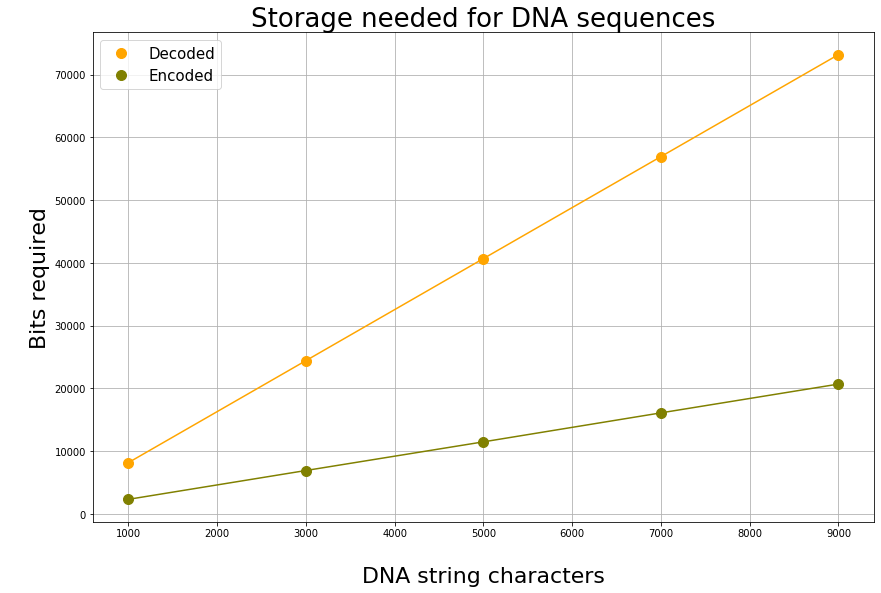

In [78]:
#Stablishing the size of the figure
plt.figure(figsize=[14,9])
plt.plot(df.Length, df['Decoded (size)'],'.',color='orange',markersize=20,label='Decoded')
plt.plot(df.Length, df['Decoded (size)'],color = 'orange')
plt.plot(df.Length, df['Encoding (size)'],'.',color = 'olive',markersize=20,label='Encoded')
plt.plot(df.Length, df['Encoding (size)'],color = 'olive')
plt.xlabel('\nDNA string characters',fontsize=22)
plt.ylabel('\nBits required',fontsize = 22)
plt.title('Storage needed for DNA sequences',fontsize = 26)
plt.legend(fontsize = 15)
plt.grid()
plt.savefig('Storage needed for DNA sequences.jpg',dpi=200)
plt.show()